# Simple example of Jaccard index between multi-polygons computaion 

## Version using the 'performance' package of Satsense

## Imports and visualization functions

In [1]:
from matplotlib import pyplot
from shapely.geometry import MultiPolygon
from descartes.patch import PolygonPatch
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim

In [2]:
RED = '#FF0000'
GREEN = '#008000'
al = 0.8

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)
    
def show_multipolygon(multipolygon, axis, xrange, yrange, color, al, title):
        
    for polygon in multipolygon:
        plot_coords(axis, polygon.exterior)
        patch = PolygonPatch(polygon, facecolor=color, edgecolor=color, alpha=al, zorder=2)
        axis.add_patch(patch)
   
    axis.set_xlim(*xrange)
    axis.set_xticks(range(*xrange))
    axis.set_ylim(*yrange)
    axis.set_yticks(range(*yrange))
    axis.set_aspect(1)
            
    axis.set_title(title)
    
    return axis

 ## Defining 2 simple multipolygons and visualizing them 

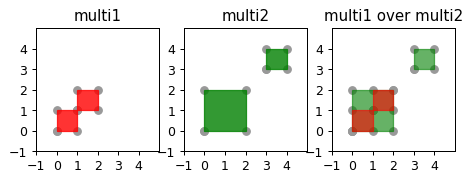

In [3]:
# 1: valid multi-polygon
fig = pyplot.figure(1, dpi=90)

xrange = [-1, 5]
yrange = [-1, 5]

ax = fig.add_subplot(131)

a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

multi1 = MultiPolygon([[a, []], [b, []]])

show_multipolygon(multi1, ax, xrange, yrange, RED, al, 'multi1')


# 2: valid multi-polygon
ax = fig.add_subplot(132)

c = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
d = [(3, 3), (3, 4), (4, 4), (4, 3), (3, 3)]

multi2 = MultiPolygon([[c, []], [d, []]])

show_multipolygon(multi2, ax, xrange, yrange, GREEN, al, 'multi2')

# 3: overplay of the polygons
ax = fig.add_subplot(133)

show_multipolygon(multi2, ax, xrange, yrange, GREEN, al-0.2, '')  
show_multipolygon(multi1, ax, xrange, yrange, RED, al-0.2, 'multi1 over multi2')    
    
pyplot.show()

## Jaccard Index between the Union between the 2 multipolygons.

In [4]:
jim(multi1, multi2)


0.4